First 10 Records:
   Attendance  StudyHours  Assignments  ExamScore
0          88         1.1           42       60.1
1          78         2.7           59       61.2
2          64         2.6           99       74.5
3          92         2.2           98       70.3
4          57         1.1           75       52.5
5          70         1.8           58       55.3
6          88         3.8           65       70.7
7          68         4.2           42       62.6
8          72         3.4           58       68.3
9          60         4.7           59       58.4

Model Evaluation Metrics:
R² Score: 0.796
Mean Absolute Error: 4.27


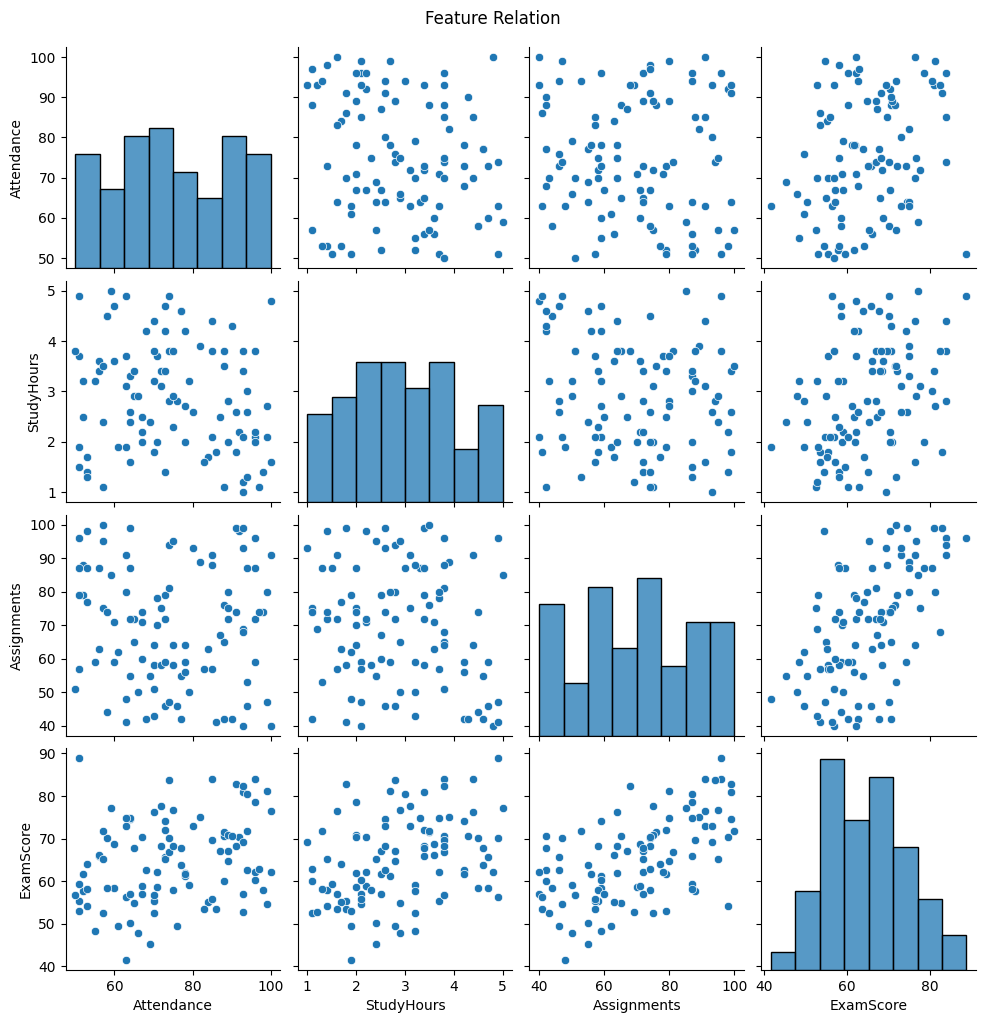

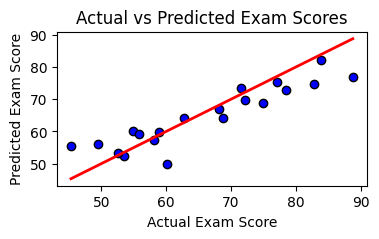


Enter details to predict exam score:
Enter Attendance (%): 85
Enter Study Hours per Day: 3
Enter Assignment Score: 75

Predicted Exam Score: 69.92


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("/content/student_scores_dataset.csv")
print("First 10 Records:")
print(df.head(10))

X = df[['Attendance', 'StudyHours', 'Assignments']]
y = df['ExamScore']

# Data transforming
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("\nModel Evaluation Metrics:")
print("R² Score:", round(r2_score(y_test, y_pred), 3))
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred), 2))

# Visualizations
sns.pairplot(df)
plt.suptitle("Feature Relation", y=1.02)
plt.show()

# Actual vs Predicted
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

# New student (user input)
print("\nEnter details to predict exam score:")
attendance = float(input("Enter Attendance (%): "))
study_hours = float(input("Enter Study Hours per Day: "))
assignments = float(input("Enter Assignment Score: "))

new_data = pd.DataFrame([[attendance, study_hours, assignments]], columns=['Attendance', 'StudyHours', 'Assignments'])
new_data_scaled = scaler.transform(new_data)


predicted_score = model.predict(new_data_scaled)
print(f"\nPredicted Exam Score: {round(predicted_score[0], 2)}")
